In [70]:
#MNIST Images of handwritten digits 70K,size of each image is 28 x 8
!pip install tensorflow

In [71]:
from tensorflow.keras.datasets import mnist

In [72]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

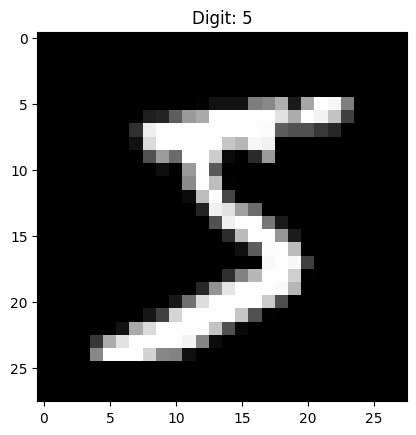

In [73]:
import matplotlib.pyplot as plt
image=train_images[0]
label=train_labels[0]
plt.imshow(image,cmap='gray')
plt.title(f"Digit: {label}")
plt.show()

In [74]:
train_images.shape

(60000, 28, 28)

In [75]:
train_labels.shape

(60000,)

In [76]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [77]:
test_images.shape

(10000, 28, 28)

In [78]:
test_labels.shape

(10000,)

In [79]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [80]:
from tensorflow import keras
from tensorflow.keras import layers

In [81]:
model=keras.Sequential(
    [layers.Dense(512,activation='relu'),
    layers.Dense(10,activation='softmax')]
)

In [82]:
#relu(x,)=max(0,x)
def relu(x):
  return max(0,x)
print(relu(-3))
print(relu(10))

0
10


In [83]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [84]:
train_images=train_images.reshape((60000,28*28))
train_images.shape

(60000, 784)

In [85]:
train_images[100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [86]:
train_images=train_images.astype("float32")/255

In [87]:
test_images=test_images.reshape([10000,28*28])
test_images=test_images.astype("float32")/255

In [88]:
model.fit(train_images,train_labels,epochs=5,batch_size=128,verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8651 - loss: 0.4724
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9663 - loss: 0.1195
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9786 - loss: 0.0731
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9857 - loss: 0.0501
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9889 - loss: 0.0373


In [89]:
test_digit=test_images[0:10]
test_digit.shape

(10, 784)

In [90]:
predictions=model.predict(test_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [91]:
predictions[0]

array([1.11900444e-08, 1.65665757e-08, 7.31063847e-06, 3.22391388e-05,
       8.54647964e-10, 2.47581909e-07, 5.59418961e-12, 9.99955714e-01,
       2.75714115e-07, 4.20503829e-06], dtype=float32)

In [92]:
predictions[0].argmax()

np.int64(7)

In [93]:
test_labels[0]

np.uint8(7)

In [94]:
predictions[1]

array([2.3712571e-08, 4.2646710e-04, 9.9957103e-01, 1.0602614e-06,
       6.8642999e-12, 9.2416542e-07, 5.6644126e-08, 3.1117472e-13,
       4.3468782e-07, 3.9908143e-11], dtype=float32)

In [95]:
predictions[1].argmax()

np.int64(2)

In [96]:
predictions[1]

array([2.3712571e-08, 4.2646710e-04, 9.9957103e-01, 1.0602614e-06,
       6.8642999e-12, 9.2416542e-07, 5.6644126e-08, 3.1117472e-13,
       4.3468782e-07, 3.9908143e-11], dtype=float32)

In [97]:
test_labels[1]

np.uint8(2)

In [98]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9774 - loss: 0.0772
Test accuracy: 98.01%
